**Libraries**

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import csv
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import *
from matplotlib import gridspec
from scipy.optimize import curve_fit

**Read in the Data**

In [47]:
aluminium = pd.read_csv('data/Alu_Linsi_Serck.csv')
copper = pd.read_csv('data/Copper_Linsi_Serck.csv')
water = pd.read_csv('data/Water_Linsi_Serck.csv')


w_time = pd.to_numeric(water['Time'], errors="coerce")[1:]
w_channelA = pd.to_numeric(water['Channel A'], errors="coerce")[1:]
w_temp = w_channelA/0.4
w_time.head()


1    0.000000
2    0.133333
3    0.266667
4    0.400000
5    0.533333
Name: Time, dtype: float64

In [51]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

def Lorentz(x,y0,a,xc,w):
    return y0+(2*a/np.pi)*(w/(4*(x-xc)**2 + w**2))


# Initial guesses for A, mu, sigma
initial_guess = [max(w_temp), np.mean(w_time), np.std(w_time)]

# Fit the curve
params, covariance = curve_fit(gaussian, w_time, w_temp, p0=initial_guess)

# Extract fitted parameters
A_fit, mu_fit, sigma_fit = params


Variables for our Plot

In [52]:
step =5 #only plotting every n-th point to avoid overplotting

x_ticker_count = 5
y_ticker_count = 4



The Plotting itself.

Text(0.5, 1.0, 'PT100 [mV]')

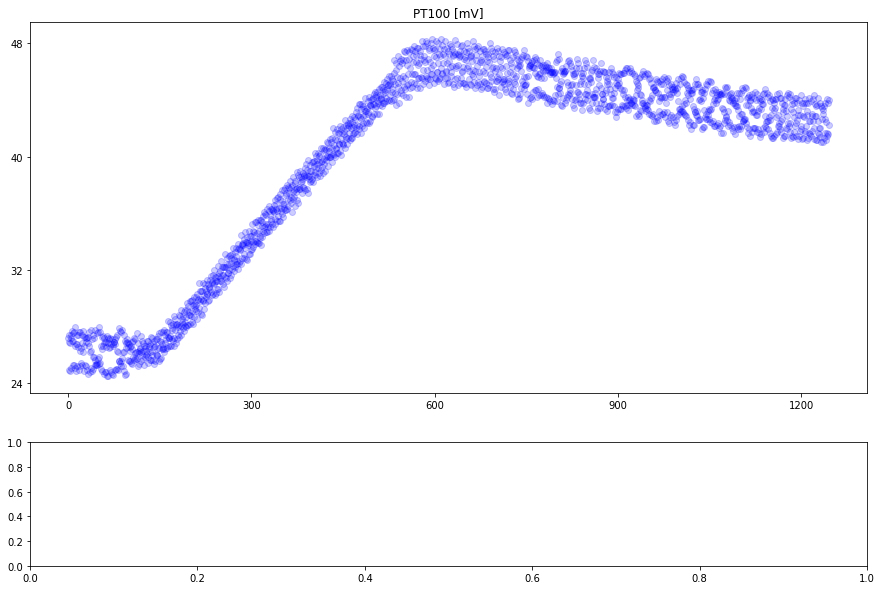

In [ ]:

fig = plt.figure(figsize=(15, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
#x_fit = np.linspace(min(w_time), max(w_time), 1000)
#y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax0.xaxis.set_major_locator(MaxNLocator(x_ticker_count))  # Reduce number of x-axis ticks
ax0.yaxis.set_major_locator(MaxNLocator(y_ticker_count))  # Limit to 5 major y-axis ticks

ax0.plot(w_time[::step], w_temp[::step],'o',alpha=0.2,color='b',)
ax0.set_title("PT100 [mV]")

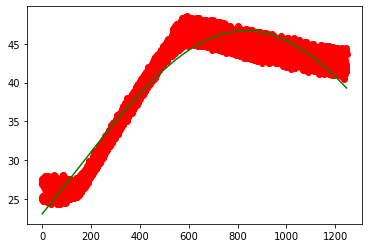

In [65]:

plt.scatter(w_time, w_temp, label="Data", color="red")
plt.plot(x_fit, y_fit, label="Gaussian Fit", color="green")